In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime
import matplotlib.pyplot as plt

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
x_train = pd.read_csv("/content/drive/MyDrive/Google_train_data.csv", index_col = "Date", parse_dates = True)
x_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [71]:
x_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [72]:
x_train.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [73]:
Close = []
for col in x_train["Close"]:
  Close.append("".join(col.split(",")))

x_train["Close"] = Close

In [74]:
x_train["Close"] =  x_train["Close"].astype(float)

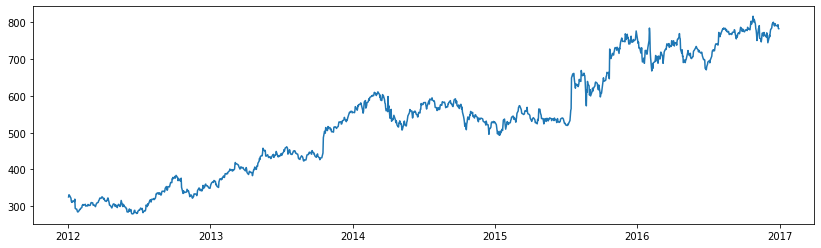

In [75]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])

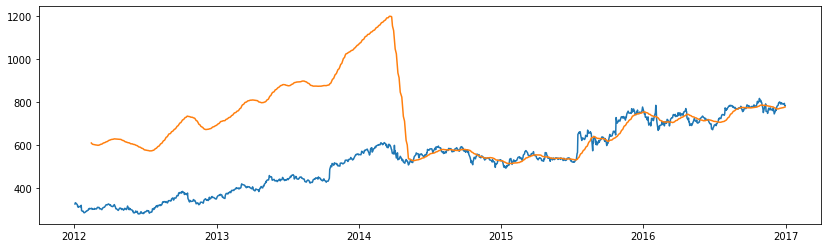

In [76]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Open"])
plt.plot(x_train.index, x_train["Close"].rolling(window = 30).mean())

In [77]:
x_train["Close_30_Days_Mean"] = x_train["Close"].rolling(window = 30).mean()

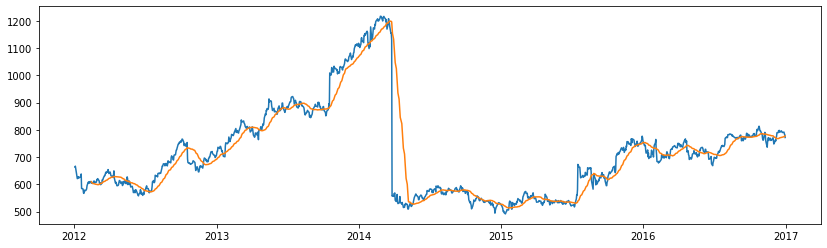

In [78]:
plt.figure(figsize = (14,4))
plt.plot(x_train.index, x_train["Close"])
plt.plot(x_train.index, x_train["Close_30_Days_Mean"])

In [79]:
x_train.rolling(7).mean().head(20)

,Open,High,Low,Close,Close_30_Days_Mean
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,NaN
2012-01-12,321.457143,322.882857,316.841429,638.037143,NaN
2012-01-13,318.698571,319.801429,314.025714,631.870000,NaN


In [80]:
x_train.rolling(window = 30).mean().head(60)

,Open,High,Low,Close,Close_30_Days_Mean
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN


In [81]:
x_train = x_train["Close"]
x_train = pd.DataFrame(x_train)

In [82]:
x_train.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


In [83]:
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)

In [84]:
x_train_scaled

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [85]:
x_train_scaled.shape

(1258, 1)

In [86]:
x_train_scaled_final = []
y_train_scaled_final = []
for i in range(30,1258):
  x_train_scaled_final.append(x_train_scaled[i-30:i,0])
  y_train_scaled_final.append(x_train_scaled[i,0])

x_train_scaled = np.array(x_train_scaled_final)
y_train_scaled = np.array(y_train_scaled_final)

In [87]:
x_train_scaled.shape

(1228, 30)

In [88]:
x_train_scaled = x_train_scaled.reshape(1228,30,1)

In [89]:
x_train_scaled.shape

(1228, 30, 1)

In [90]:
y_train_scaled.shape

(1228,)

In [91]:
model = Sequential()

In [92]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_scaled.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [93]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train_scaled, y_train_scaled, epochs = 10, batch_size = 30)

Epoch 1/10
41/41 [==============================] - 12s 91ms/step - loss: 0.0269
Epoch 2/10
41/41 [==============================] - 3s 72ms/step - loss: 0.0104
Epoch 3/10
41/41 [==============================] - 3s 73ms/step - loss: 0.0095
Epoch 4/10
41/41 [==============================] - 3s 73ms/step - loss: 0.0076
Epoch 5/10
41/41 [==============================] - 3s 70ms/step - loss: 0.0077
Epoch 6/10
41/41 [==============================] - 3s 71ms/step - loss: 0.0062
Epoch 7/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0059
Epoch 8/10
41/41 [==============================] - 3s 72ms/step - loss: 0.0070
Epoch 9/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0052
Epoch 10/10
41/41 [==============================] - 3s 68ms/step - loss: 0.0055


In [94]:
x_train = pd.DataFrame(x_train)

In [95]:
test_df = pd.read_csv("/content/drive/MyDrive/Google_test_data.csv", index_col = "Date", parse_dates = True)
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-08-13 to 2019-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [97]:
real_stock_price = test_df["Close"]

In [98]:
test_df = pd.DataFrame(test_df["Close"])

In [99]:
test_df

,Close
Date,
2018-08-13,1235.010010
2018-08-14,1242.099976
2018-08-15,1214.380005
2018-08-16,1206.489990
2018-08-17,1200.959961
...,...
2019-08-07,1173.989990
2019-08-08,1204.800049
2019-08-09,1188.010010


In [100]:
data_set_total = pd.concat((x_train, test_df), axis = 0)
inputs = data_set_total[len(data_set_total) - len(test_df) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(30,282):
  x_test.append(inputs[i - 30: i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)

In [105]:
predicted_stock_price["Close"] = predicted_stock_price

In [107]:
predicted_stock_price.drop(columns = [0])

,Close
0,798.338867
1,803.684570
2,822.842957
3,858.888428
4,910.979187
...,...
247,1155.538208
248,1154.343994
249,1150.365356
250,1144.716309


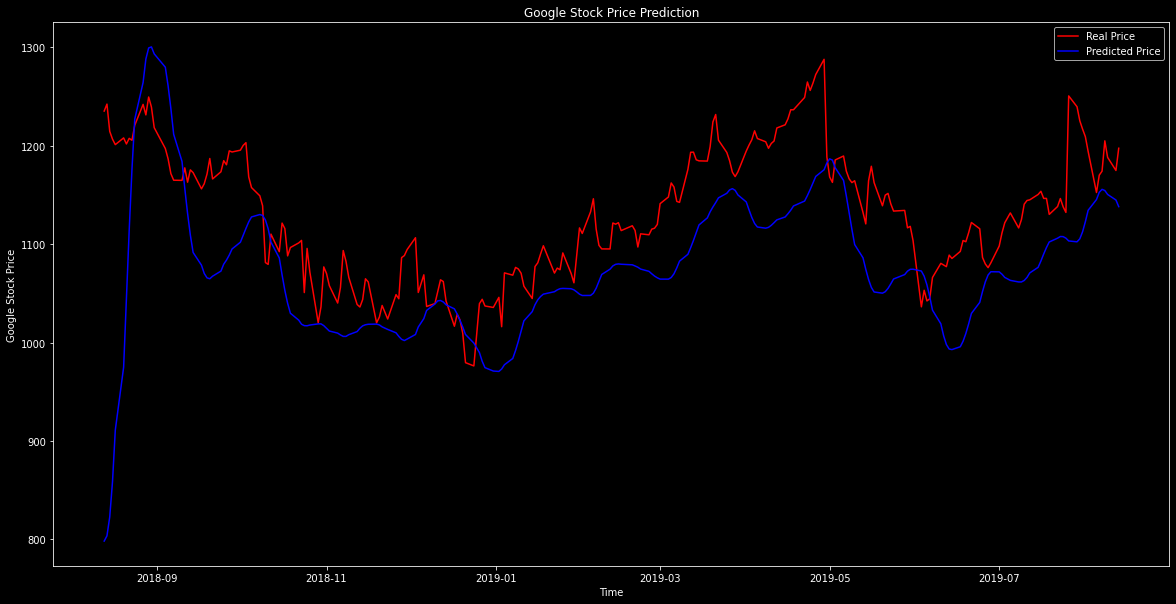

In [115]:
plt.figure(figsize = (20,10))
plt.style.use("dark_background")
plt.plot(test_df.index,real_stock_price,color = 'red', label = 'Real Price')
plt.plot(test_df.index, predicted_stock_price["Close"], color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()